<div style="text-align: center;">
    <h1><strong>Physics 129L: Problem Set 5</strong></h1>
</div>

<div style="text-align: center;">
    <h3><strong>Problem Set Submission Guideline</strong></h3>
</div>

**A) Github Submissions**
We will use GitHub for problem set submissions. To access the problem set, please **fork** and **clone** the **forked** repository to your local virtual machine. **Please complete the problem set in this forked directory.** Submit **a pull request** for merging into the main branch before the problem set due date.

**B) .tar.gz File compression and submission on Github**
For each problem set, you are asked to submit the compressed version of the problem set to GitHub via git operation. Here is a step-by-step guideline:

1. Use the **tar** command to compress the problem set directory into a **single** ".tar.gz" file.
2. Obtain the sha256sum by running "sha256sum P2.tar.gz".
3. Echo the **full sha256sum** to a text file named "sha25sum_problem_set.txt".
4. Initialize a git repository named "Archive_P# (#: problem set number) on your local machine, and move both the "tar.gz" file and the "sha25sum_problem_set.txt" file to the repository.
5. Create an empty **public** directory under the **same name** in **your own GitHub account**.
6. **Push** this local repository to the remote repository.


<div style="text-align: center;">
    <h3><strong>Imports and built-in functions</strong></h3>
</div>

In [3]:
import numpy as np
#Import in-built functions for different integration techniques
#For reference: https://docs.scipy.org/doc/scipy/reference/integrate.html
from scipy.integrate import quad, fixed_quad, romberg, dblquad
#For plotting
import matplotlib.pyplot as plt
%matplotlib inline

<div style="text-align: center;">
    <h2><strong>Problem 1: Quadrature </strong></h2>
</div>
Let's looked at different quadrature methods and rules. 


<div style="text-align: center;">
    <h2><strong> Midpoint rule </strong></h2>
</div>
$$\int_{a}^{b} f(x) \, dx \approx (b - a) \cdot f\left(\frac{a + b}{2}\right)
$$

<div style="text-align: center;">
    <h2><strong> Trapezoidal Rule  </strong></h2>
</div>

$$\int_{a}^{b} f(x) \, dx \approx \frac{b - a}{2} \left[ f(a) + f(b) \right]$$

<div style="text-align: center;">
    <h2><strong> Simpson's Rule </strong></h2>
</div>
$$\int_{a}^{b} f(x) \, dx \approx \frac{b - a}{3} \left[ f(a) + 4f\left(\frac{a + b}{2}\right) + f(b) \right]$$


## A) 
Define a class for all quadrature techniques.

In [5]:
class Quad_:
    def __init__(self,fuc,N,a,b):
        '''The class take an additional input, called order. 
        make sure you look into super(). '''
        self.fuc=fuc
        self.N=N
        self.a=a
        self.b=b
        pass 
class Mid_(Quad_):
    def returnQ(self):
        return self.N
    
class Trap_(Quad_):
    def returnQ(self):
        pass
    
class Simp_(Quad_):
    def returnQ(self):
        pass


## B) 
Write the above three quadrature rules as class methods **without any pre-defined function from any package** 1)  Midpoint rule 2) Trapezoidal Rule 3) Simpson's Rule. You need to figure out what additional inputs each rule needs. 

In [6]:
# Add the following to the class in part A). 
def mid_quad(self):
    h = (self.b - self.a) / self.N  
    integral = 0.0

    for i in range(self.N):
        x_i = self.a + (i + 0.5) * h  
        integral += self.fuc(x_i)

    #print( h * integral)
    pass
def trapz_quad(self):
    h = (self.b - self.a) / self.N  
    integral = 0.5 * (self.fuc(self.a) + self.fuc(self.b))

    for i in range(1, self.N):
        x_i = self.a + i * h
        integral += self.fuc(x_i)

    integral *= h  
    print(integral)
    pass
def simpson_quad(self):

    h = (self.b - self.a) / self.N  
    integral = self.fuc(self.a) + self.fuc(self.b)

    for i in range(1, self.N):
        x_i = self.a + i * h
        if i % 2 == 0:
            integral += 2 * self.fuc(x_i)
        else:
            integral += 4 * self.fuc(x_i)

    integral *= h / 3  
    print(integral)
    pass

Mid_.mid_quad=mid_quad
Trap_.trapz_quad=trapz_quad
Simp_.simpson_quad=simpson_quad
def test_fun(x):
    return x**2
testfunmid=Mid_(test_fun,10,1,2)
testfunmid.mid_quad()
testfuntrap=Trap_(test_fun,10,1,2)
testfuntrap.trapz_quad()
testfunsimp=Simp_(test_fun,10,1,2)
testfunsimp.simpson_quad()


2.3350000000000004
2.3333333333333335


<div style="text-align: center;">
    <h3><strong> Gauss-Legendre Quadrature </strong></h3>
</div>

$$\int_{-1}^{1} f(x) \, dx \approx \sum_{i=1}^{N} w_i \cdot f(x_i)$$


## C)
Since the range is from a to b, let's make a variable change,
$$x_i \to \frac{b - a}{2} x_i + \frac{a + b}{2}$$

Calculate the above condition **analytically**,
<br> 
''**write you answer below**''
<br><br> **Steps:** <br>
<br>
1. If we suppose that $$u=\frac{b - a}{2} x + \frac{b - a}{2}$$ and $$ \frac{du}{dx}=\frac{b - a}{2}$$ It follows that we can write the integral $$\int_{-1}^{1} f(u) \, du$$ as $$\frac{b - a}{2}\int_{0}^{b-a} f(u)\frac{du}{dx} dx$$
2. Based upon what we know about the approximation, it follows that $$\frac{b - a}{2}\int_{0}^{b-a} f(u)\frac{du}{dx} dx \approx \frac{b - a}{2}\sum_{i=1}^{N} w_i \cdot f(u_i) = \frac{b - a}{2}\sum_{i=1}^{N} w_i \cdot f(\frac{b - a}{2} x_i + \frac{b - a}{2})$$ 
'' **write you answer above**''
<br> <br> 
You should get something like this: 
$$\int_{a}^b f(x)dx = \frac{b-a}{2} \sum_i w_i f(\frac{b - a}{2} x_i + \frac{a + b}{2})$$

<div style="text-align: center;">
    <h3><strong> Legendre polynomials </strong></h3>
</div>
To find the position and weights of an order M Gauss-Legendre Quadrature, we need to calculate the roots of an order-M Legendre polynomial,
$$(1 - x^2) \frac{d^2 P_M(x)}{dx^2} - 2x \frac{dP_M(x)}{dx} + M(M + 1)P_M(x) = 0,
$$
and the solutions are given by the following:  
$$P_M(x) = \frac{1}{2^n n!} \frac{d^M}{dx^M} \left[(x^2 - 1)^M\right]$$

## D)
Write a child class named Gauss_Quad_ inherits methods from its parent class Quad_. This class takes an additional input, called order. Define a new method that outputs an order-M Legendre polynomial. Plot the following Legendre polynomials: M=[1,2,3,4,5]. 

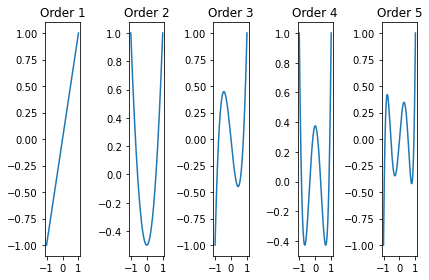

In [148]:
import sympy as sp #python package that allows easy computation of derivatives
import math
import numpy as np
import matplotlib.pyplot as plt
# Define a symbolic variable
#x = sp.symbols('x')
fig, axs = plt.subplots(1,5)
class Gauss_Quad_:
    def __init__(self,order):
        self.order=order
        '''The class take an additional input, called order. 
        make sure you look into super(). '''
        pass 
    
    
    def legendre_poly(self,x):
        # range from -1 to 1
        x1 = sp.symbols('x')
        self.x1=x1
        f = (1/(2**self.order))*(1/math.factorial(self.order))*(x1**2 - 1)**self.order
        self.f=f
        n = self.order
        nth_derivative = sp.diff(f, x1, n)
        self.nth_derivative=nth_derivative
        #print(nth_derivative)
        #print(nth_derivative.subs(x1,2))
        y=[]
        for element in x:
            y.append(nth_derivative.subs(x1,element))
        axs[self.order-1].plot(x,y)
        pass
ob1=Gauss_Quad_(1)
ob2=Gauss_Quad_(2)
ob3=Gauss_Quad_(3)
ob4=Gauss_Quad_(4)
ob5=Gauss_Quad_(5)
x=np.linspace(-1,1,500)
ob1.legendre_poly(x)
ob2.legendre_poly(x)
ob3.legendre_poly(x)
ob4.legendre_poly(x)
ob5.legendre_poly(x)
axs[0].set_title('Order 1')
axs[1].set_title('Order 2')
axs[2].set_title('Order 3')
axs[3].set_title('Order 4')
axs[4].set_title('Order 5')
plt.tight_layout()

<div style="text-align: center;">
    <h3><strong> Newton's Method </strong></h3>
</div>
The positions of an order M Gauss-Legendre Quadrature are calculated by finding roots of an order-M Legendre polynomial,
 <br>  <br> 
$$P_M(x)=0.$$
 <br> 
To numerically find those roots (M of them), we can use the Newton's method: 
 <br> 
$$x_{n+1} = x_{n} - \frac{P_M(x_{n})}{P_M'(x_{n})}.$$
You should be careful on the initial guess.
 <br> 
The weights $w_i$ for Gauss-Legendre Quadrature are calculated as:
$$w_i = \frac{2}{(1 - x_i^2) [P'_M(x_i)]^2}$$
where $P'_M(x_i)$ is the derivative of the Legendre polynomial of degree M evaluated at each root $x_i$. 

## E) 
 Calculate 'M' position and weights for Gaussian quadrature integration between 'a' and 'b' with the Newton's method. Returns a tuple of 2 arrays, the first array is the position of points and second array is the corresponding weights. Output an text file that contains the roots and weights for M=[1,2,3,4,5]. 

In [350]:
# Add the following to the class in part D). 
def newton_method_root(self,tol):
    num_iter=100 #number of times we guess
    P_prime=sp.diff(self.nth_derivative,self.x1)
    print(P_prime)
    x0=0
    for i in range(num_iter):
        f1=self.nth_derivative
        poly = f1.subs(self.x1, x0)
        print(poly)
        poly_prime = P_prime.subs(self.x1, x0)
        print(poly_prime)
        if abs(poly) < tol:
            break
        x0 = x0 - poly / poly_prime
    return x0

Gauss_Quad_.newton_method_root=newton_method_root
#ob2.newton_method_root(1e-6)

## F) 
Using the the following information,
https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.roots_legendre.html
, calculate the roots and weights for M=[1,2,3,4,5]. Do they agree with what you calculate in E)?  

In [170]:
# Add the following to the class in part D). 
from scipy.special import roots_legendre 
def scipy_method_root(self,order):
    roots, weights = roots_legendre(order)
    self.roots=roots
    self.weights=weights
    return roots, weights
    pass

Gauss_Quad_.scipy_method_root=scipy_method_root
l1=Gauss_Quad_(1)
l1.scipy_method_root(1)
l2=Gauss_Quad_(2)
l2.scipy_method_root(2)
l3=Gauss_Quad_(3)
l3.scipy_method_root(3)
l4=Gauss_Quad_(4)
l4.scipy_method_root(4)
l5=Gauss_Quad_(5)
l5.scipy_method_root(5)

(array([-0.90617985, -0.53846931,  0.        ,  0.53846931,  0.90617985]),
 array([0.23692689, 0.47862867, 0.56888889, 0.47862867, 0.23692689]))

## G)
Based on the roots and weights, write a method that output the Gauss-Legendre Quadrature. 

In [179]:
# Add the following to the class in part D).
def gauss_quad(self,fuc):
    intg=0
    print(self.roots)
    print(self.weights)
    for i, element in enumerate(self.roots):
        intg=intg+(self.weights[i]*element)
    return intg
    pass 
Gauss_Quad_.gauss_quad=gauss_quad
def test_fun(x):
    return x**2
rand=Gauss_Quad_(5)
rand.scipy_method_root(5)
rand.gauss_quad(test_fun)

[-0.90617985 -0.53846931  0.          0.53846931  0.90617985]
[0.23692689 0.47862867 0.56888889 0.47862867 0.23692689]


-2.7755575615628914e-17

<div style="text-align: center;">
    <h3><strong> Quadrature on test functions </strong></h3>
</div>

In the following question, we want to Use the above four methods, mid_quad, trapz_quad, simpson_quad, gauss_quad, to numerically calculate the quarature on two test functions ($k\geq 0)$

A general k-th order polynomial with a quadrature, 
$$I^{\rm T=A}_{\rm true}=\int_{a}^b dx x^k=\frac{1}{k+1}(b^{k+1}-a^{k+1})$$

A Fermi–Dirac distribution with a quadrature, 
$$I^{\rm T=B}_{\rm true}=\int_{a}^b dx \frac{1}{{1 + e^{-kx}}}=\frac{1}{k}(\log(e^{kb}+1)-\log(e^{ka}+1))$$


Let's define the following: for each order k and N, we have the quadrature value and the relative error,
1) mid_quad: $M(k,N)$,<br><br> $\Delta M(k,N)=2\frac{I_{\rm true}-M(k,N)}{I_{\rm true}+M(k,N)}$,
<br><br><br>
2) trapz_quad: $T(k,N)$,<br><br> $\Delta T(k,N)=2\frac{I_{\rm true}-T(k,N)}{I_{\rm true}+T(k,N)}$,
<br><br><br>
3) simpson_quad: $S(k,N)$,<br><br> $\Delta S(k,N)=2\frac{I_{\rm true}-S(k,N)}{I_{\rm true}+S(k,N)}$,
<br><br><br>
4) gauss_quad: $G(k,N)$,<br><br> $\Delta G(k,N)=2\frac{I_{\rm true}-G(k,N)}{I_{\rm true}+G(k,N)}$,

Let's make the following heatmap for each quadrature method above, 1-4), over the range $[0,1]$: 

y-axis: k from 0 to 10

x-axis: N from 10 to $10^5$

value: relative error




## H) Polynomial





In [391]:


'''--------------------Write your code below this line------------------------------'''
yax=np.linspace(0,10,100)
xax=np.linspace(10,100000,10)
rangex=np.linspace(0,1,100)
a1=[]
a2=[]
a3=[[]]

for j in xax:
    for k in range(0,11):
        def practice(x):
            return x**k
        #print(int(j))
        one=Mid_(practice,int(j),0,1)
        a1.append(xax)
        a2.append(k)
        a3[0].append(one.mid_quad())
for j in xax:
    for k in range(0,11):
        def practice(x):
            return x**k
        #print(int(j))
        one=Trap_(practice,int(j),0,1)
        a1.append(xax)
        a2.append(k)
        a3[0].append(one.trap_quad())       
for j in xax:
    for k in range(0,11):
        def practice(x):
            return x**k
        #print(int(j))
        one=Simp_(practice,int(j),0,1)
        a1.append(xax)
        a2.append(k)
        a3[0].append(one.simp_quad())           
        
#neww=practice()
#one=Mid_(practice,10,1,2)
#one.mid_quad()
#def mi(k,)
#for i in rangea:
    #for j in rangeb:
        #if i>j:
            
x = np.array(a1)
y = np.array(a2)
z = np.array(a3)

plt.imshow(z, cmap='viridis', extent=[min(a1), max(a1), min(a2), max(a2)])

'''--------------------Write your code above this line------------------------------'''

1.0
0.5000000000000001
0.3325
0.24875000000000003
0.19833625000000005
0.16459062500000007
0.14037170312500008
0.12210877343750007
0.10781839616406258
0.0963107671132813
0.08682896044580085
1.0
0.5000000000000002
0.3333333326594127
0.24999999898911823
0.19999999865215745
0.1666666649818635
0.14285714083537923
0.12499999764127563
0.11111110841542608
0.09999999696735425
0.09090908753948453
1.0
0.5000000000000016
0.33333333316470015
0.2499999997470525
0.19999999966273638
0.16666666624508647
0.1428571423512471
0.12499999940978798
0.11111111043658345
0.0999999992411565
0.09090909006593098
1.0
0.5
0.3333333332583633
0.24999999988754495
0.19999999985005992
0.16666666647924216
0.14285714263223304
0.12499999973760506
0.11111111081123128
0.09999999966263523
0.09090909053424094
1.0
0.5000000000000001
0.3333333332911583
0.24999999993673508
0.19999999991564577
0.1666666665612244
0.1428571427306115
0.12499999985238051
0.11111111094240304
0.09999999981020381
0.09090909069820619
0.9999999999999999
0.49

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

## H) Fermi–Dirac


'--------------------Write your code above this line------------------------------'

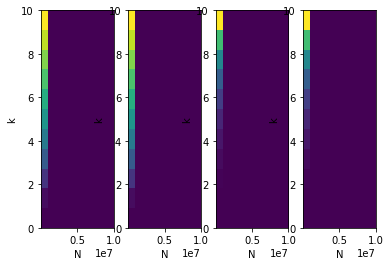

In [25]:

'''--------------------Write your code below this line------------------------------'''

from scipy.integrate import quad
#since the last code wasn't working I tried using reestablished functions outside of the Gauss class (I tried this with classes)
fig, axs = plt.subplots(1,4)
k_values = np.arange(0, 11)
n_values =np.arange(10, int(10e6+10e5),int(10e5))
def dirac(x, k):
    return 1 /(1 + np.exp(-k * x))

def true_integral(k, a=0, b=1):
    integrand = lambda x: dirac(x, k)
    result, _ = quad(integrand, a, b)
    return result

def midpoint(func, a, b, N):
    h = (b - a) / N
    midpoints = np.linspace(a + h/2, b - h/2, N)
    integral_approx = h * np.sum(func(midpoints))
    return integral_approx

def trap(func, a, b, N):
    h = (b - a) / N
    x_points = np.linspace(a, b, N+1)
    y_points = func(x_points)
    integral_approx = h / 2 * (y_points[0] + 2*np.sum(y_points[1:N]) + y_points[N])
    return integral_approx

def simpsons(func, a, b, N):
    h = (b - a) / N
    x_points = np.linspace(a, b, N+1)
    y_points = func(x_points)
    integral_approx = h / 3 * (y_points[0] + 4*np.sum(y_points[1:N:2]) + 2*np.sum(y_points[2:N-1:2]) + y_points[N])
    return integral_approx

def gauss(func, k, N):
    nodes, weights = roots_legendre(N)
    integral_approx = sum(weights * func(nodes, k))
    return integral_approx

def relative(k_values, n_values):
    relative_errors = np.zeros((len(k_values), len(n_values)))

    for i, k in enumerate(k_values):
        for j, N in enumerate(n_values):
            approx_value = midpoint(lambda x: dirac(x, k), 0, 1, N)
            true_value = true_integral(k)
            rel_error = 2 * np.abs(true_value - approx_value) / (true_value + approx_value)
            relative_errors[i, j] = rel_error

    return relative_errors

def relative2(k_values, n_values):
    relative_errors = np.zeros((len(k_values), len(n_values)))

    for i, k in enumerate(k_values):
        for j, N in enumerate(n_values):
            approx_value = simpsons(lambda x: dirac(x, k), 0, 1, N)
            true_value = true_integral(k)
            rel_error = 2 * np.abs(true_value - approx_value) / (true_value + approx_value)
            relative_errors[i, j] = rel_error

    return relative_errors

def relative3(k_values, n_values):
    relative_errors = np.zeros((len(k_values), len(n_values)))

    for i, k in enumerate(k_values):
        for j, N in enumerate(n_values):
            approx_value = trap(lambda x: dirac(x, k), 0, 1, N)
            true_value = true_integral(k)
            rel_error = 2 * np.abs(true_value - approx_value) / (true_value + approx_value)
            relative_errors[i, j] = rel_error

    return relative_errors

def relative4(k_values, n_values):
    relative_errors = np.zeros((len(k_values), len(n_values)))

    for i, k in enumerate(k_values):
        for j, N in enumerate(n_values):
            approx_value = gauss(lambda x: dirac(x, k), 0, 1, N)
            true_value = true_integral(k)
            rel_error = 2 * np.abs(true_value - approx_value) / (true_value + approx_value)
            relative_errors[i, j] = rel_error

    return relative_errors

def plot_heatmap(relative_errors, k_values, n_values,i):
    #axs[0].figure(figsize=(10, 6))
    axs[i].imshow(relative_errors, extent=[min(n_values), max(n_values), min(k_values), max(k_values)],
               aspect='auto', cmap='viridis', origin='lower')
    #axs[0].set_colorbar(label='Relative Error')
    axs[i].set_xlabel('N')
    axs[i].set_ylabel('k')
    #axs[0].show()



midpoint_errors = relative(k_values, n_values)
plot_heatmap(midpoint_errors, k_values, n_values,0)
trap_errors = relative3(k_values,n_values)
plot_heatmap(trap_errors, k_values, n_values,1)
simp_errors = relative2(k_values,n_values)
plot_heatmap(simp_errors, k_values, n_values,2)
gauss_errors = relative2(k_values,n_values)
plot_heatmap(gauss_errors, k_values, n_values,3)
'''--------------------Write your code above this line------------------------------'''

<div style="text-align: center;">
    <h2><strong> Harmonic Oscillator </strong></h2>
</div>

This question is adapted from Prof.Uros Seljak (Berkeley) problem set 1 question 1. For more information, please visit https://phy151-ucb.github.io/seljak-phy151-fall-2018/#course-syllabus


The total energy of a harmonic oscillator is given by <br>
$$ E = \frac{1}{2}m \left(\frac{dx}{dt}\right)^2 + V(x) $$
Assuming that the potential $V(x)$ is symmetric about $x=0$ and the amplitude of the oscillator is $a$. Then the equation for the time period is given by <br>
$$ T = \sqrt{8m} \int_0^a \frac{dx}{\sqrt{V(a) - V(x)}} $$


## A)
Suppose the potential is $V(x) = x^4$ and mass of the particle $m=1$, write a function that calculates the period for a given amplitude.

In [318]:
import scipy.integrate as spi


def V(x):
    'Potential'
    return x**4

def timep(x, a):
    'Define the function that needs to be integrated (integrand) to calculate time period'
    m=1
    def new_fun(x):
        return np.sqrt(8*m)*(1/(np.sqrt(V(a)-V(x))))
    result, error = spi.quad(new_fun, lower_limit, upper_limit)
    return result
timep(x,2)

1.8540746773017016

## B) 
Let $a = 2$. Use inbuilt 'fixed_quad' (https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.integrate.fixed_quad.html) function to calculate the time period for different values of 'N' (number of integration points). Calculate the error in the integral by estimating the difference for 'N' & '2N'. Approximately, at what 'N' is the absolute error less than $10^{-4}$ for 'a = 2'?

In [253]:


'''--------------------Write your code below this line------------------------------'''
a=2
b=0
m=1
N = 5
Va=V(a)
func = lambda x: np.sqrt(8*m)*(1/(np.sqrt(Va-x**4)))
print(spi.fixed_quad(func, 0.0, 2.0,n=5))
x=spi.fixed_quad(func, 0.0, 2.0,n=N)
y=spi.fixed_quad(func, 0.0, 2.0,n=2*N)
np.array(x)
np.array(y)
print(y[0])
print(x[0])
print(abs(y[0]-x[0]))
def finderror(n):
    for nums in n:
        x=spi.fixed_quad(func, 0.0, 2.0,n=nums)
        y=spi.fixed_quad(func, 0.0, 2.0,n=2*nums)
        xn=np.array(x)
        yn=np.array(y)
        #print(abs(yn[0]-xn[0]))
        if abs(yn[0]-xn[0]) < 10e-4:
            print(yn[0]-xn[0])
            print(nums)
            break
    
    
n=np.linspace(1,1000,1000)
finderror(n)

#N=308 is when we recieve the desired result
'''--------------------Write your code above this line------------------------------'''

(1.7423988227627663, None)
1.7954772678567572
1.7423988227627663
0.053078445093990956
0.0009970352678623229
308.0


'--------------------Write your code above this line------------------------------'

## C) 
Use inbuilt 'quad' (https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.quad.html) function that returns an error estimate and compare your answer for 'a = 2' (quad uses a more advanced integration technique)

In [257]:


'''--------------------Write your code below this line------------------------------'''
a=2
b=0
m=1
N = 5
Va=V(a)
func = lambda x: np.sqrt(8*m)*(1/(np.sqrt(Va-x**4)))

integral, error =spi.quad(func, 0.0, 2.0)
print(integral)
print(error)
#Other error estimate was 0
'''--------------------Write your code above this line------------------------------'''

1.8540746773017016
2.006794730391448e-10


'--------------------Write your code above this line------------------------------'

 ## D) 
Calculate the time period by using the inbuilt romberg function (https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.romberg.html) for Romberg integration. 
A simplistic usage with romberg(func, 0, a), where a is the amplitude, will probably give error or 'nan'. Why? 

In [306]:


'''--------------------Write your code below this line------------------------------'''

m=1

def f(x):
    if x == 2:
        return np.sqrt(8*m)*(1/(np.sqrt(16-(x-10e-5)**4)))  
    else:
        return np.sqrt(8*m)*(1/(np.sqrt(16-x**4)))


lower_limit = 0
upper_limit = 2


print(spi.romberg(f, lower_limit, upper_limit))




#these calls to the function will include a divide by zero due to the V(a)-V(x) term in the denominator

'''--------------------Write your code above this line------------------------------'''

1.8570082545538737


'--------------------Write your code above this line------------------------------'

## E) 
Assume that we can tolerate the uncertainitiy of $10^{-5}$ in the position. Show and output of 'keyword' show = True for 'a = 2'. Use this to estimate error for divmax = 10.


In [315]:


'''--------------------Write your code below this line------------------------------'''
from scipy.special import erf
try:
    m=1

    def f(x):
        if x == 2:
            return np.sqrt(8*m)*(1/(np.sqrt(16-(x-10e-5)**4)))  
        else:
            return np.sqrt(8*m)*(1/(np.sqrt(16-x**4)))


    lower_limit = 0
    upper_limit = 2


    result, error = spi.romberg(f, lower_limit, upper_limit,tol=10e-5,show =True,divmax=10)
except:
    pass
print(error)
print("%g %g" % (2*result, erf(1)))


'''--------------------Write your code above this line------------------------------'''

Romberg integration of <function vectorize1.<locals>.vfunc at 0x7fb8d3241d30> from [0, 2]

 Steps  StepSize   Results
     1  2.000000 50.708982 
     2  1.000000 26.084788 17.876723 
     4  0.500000 13.824258  9.737414  9.194794 
     8  0.250000  7.734314  5.704333  5.435461  5.375789 
    16  0.125000  4.719307  3.714304  3.581635  3.552210  3.545058 
    32  0.062500  3.233479  2.738203  2.673130  2.658709  2.655205  2.654335 
    64  0.031250  2.506060  2.263587  2.231946  2.224943  2.223242  2.222820  2.222715 
   128  0.015625  2.153366  2.035801  2.020616  2.017261  2.016447  2.016245  2.016194  2.016181 
   256  0.007812  1.984828  1.928649  1.921506  1.919933  1.919551  1.919456  1.919433  1.919427  1.919425 
   512  0.003906  1.906089  1.879843  1.876589  1.875876  1.875703  1.875660  1.875649  1.875647  1.875646  1.875646 
  1024  0.001953  1.870632  1.858813  1.857411  1.857106  1.857033  1.857014  1.857010  1.857009  1.857008  1.857008  1.857008 

The final result is 1.8

'--------------------Write your code above this line------------------------------'

## F)
 Change divmax to change the number of divisions. How does the accuracy change on going from 10 to 15 divisions.

In [317]:


'''--------------------Write your code below this line------------------------------'''
try:
    result, error = spi.romberg(f, lower_limit, upper_limit,tol=10e-5,show =True,divmax=15)
except:
    pass
print(error)
print("%g %g" % (2*result, erf(1)))

#if we define the accuracy to be the difference between this method and quad we see that the more divmax
#the more accurate our result is in comparison.
'''--------------------Write your code above this line------------------------------'''

Romberg integration of <function vectorize1.<locals>.vfunc at 0x7fb8d3d02940> from [0, 2]

 Steps  StepSize   Results
     1  2.000000 50.708982 
     2  1.000000 26.084788 17.876723 
     4  0.500000 13.824258  9.737414  9.194794 
     8  0.250000  7.734314  5.704333  5.435461  5.375789 
    16  0.125000  4.719307  3.714304  3.581635  3.552210  3.545058 
    32  0.062500  3.233479  2.738203  2.673130  2.658709  2.655205  2.654335 
    64  0.031250  2.506060  2.263587  2.231946  2.224943  2.223242  2.222820  2.222715 
   128  0.015625  2.153366  2.035801  2.020616  2.017261  2.016447  2.016245  2.016194  2.016181 
   256  0.007812  1.984828  1.928649  1.921506  1.919933  1.919551  1.919456  1.919433  1.919427  1.919425 
   512  0.003906  1.906089  1.879843  1.876589  1.875876  1.875703  1.875660  1.875649  1.875647  1.875646  1.875646 
  1024  0.001953  1.870632  1.858813  1.857411  1.857106  1.857033  1.857014  1.857010  1.857009  1.857008  1.857008  1.857008 
  2048  0.000977  1.8556

'--------------------Write your code above this line------------------------------'

## G) 
Use the function to make a graph of the period for amplitude ranging from a=0 to a=2.

/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:849: AccuracyWarning: divmax (10) exceeded. Latest difference = 1.863768e-02
  warnings.warn(


'--------------------Write your code above this line------------------------------'

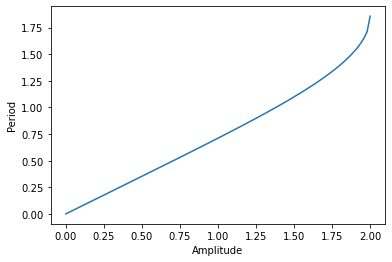

In [327]:


'''--------------------Write your code below this line------------------------------'''
a=np.linspace(0,2,100)
ys=[]
for el in a:
    
    new= spi.romberg(f, 0, el,tol=10e-5,divmax=10)
    #print(new)
    ys.append(new)
        
plt.plot(a,ys)
plt.xlabel('Amplitude')
plt.ylabel('Period')
'''--------------------Write your code above this line------------------------------'''

<div style="text-align: center;">
    <h2><strong> Black Body Radiation </strong></h2>
</div>

This question is adapted from Prof.Uros Seljak (Berkeley) problem set 1 question 2. For more information, please visit https://phy151-ucb.github.io/seljak-phy151-fall-2018/#course-syllabus


The total rate at which energy is radiated by a black body per unit area over all frequencies is 

$$ W = \frac{2 \pi k_B^4T^4}{c^2 {h}^3} \int _0^\infty \frac{x^3}{e^x -1} dx $$


## A) 
Write a function to to evaluate the integral in this expression. You will need to change the variables to go from an infinite range to a finite range. What is the change of variable and new functional form? The variable to go from range 0 to $\infty$ to a finite range of is 

$$ z = \frac{x}{1+x} $$
or equivalently
$$ x = \frac{z}{1-z} $$


In [332]:
#Constants
k = 1.38064852e-23 
h = 6.626e-34
pi= np.pi
c = 3e8
hb = h /2/pi
prefactor = k**4/c**2/hb**3/4/pi**2 
#True value
stfconst = 5.670367e-8

def blackbody_var(z):
    'Blackbody spectrum after change of variables'
    return prefactor*(z**3)/((1-z)**5)*(1/(np.exp(z/(1-z))-1))
    


5.6627049993067615e-08


/var/folders/gr/k6p8k2jd27s0_5wbw04x_bv00000gn/T/ipykernel_11201/3538033539.py:13: RuntimeWarning: overflow encountered in exp
  return prefactor*(z**3)/((1-z)**5)*(1/(np.exp(z/(1-z))-1))


## B) 
According to Stefan's law, the total energy given off by a black-body per unit area per second is given by 
$$ W = \sigma T^4 $$. Use the integral to calculate the value of Stefan Boltzmann constant $\sigma$. Use 'fixed_quad' function to do the integral.   


In [334]:


'''--------------------Write your code below this line------------------------------'''

print(spi.fixed_quad(blackbody_var,0,1,n=20))


'''--------------------Write your code above this line------------------------------'''

(5.662095850366909e-08, None)


'--------------------Write your code above this line------------------------------'

## C) 
Inbuilt 'quad' function can support an infinite range for integration. Write another function to do the integration from 0 to $\infty$ and compare your answer.

In [336]:


'''--------------------Write your code below this line------------------------------'''
def nonvar(x):
    return prefactor*(x**3)/(np.exp(x)-1)

print(spi.quad(nonvar,0,float('inf')))

#the answers are nearly the exact same except this one is slightly closer to our given value of the sb constant
'''--------------------Write your code above this line------------------------------'''

(5.6627031974081604e-08, 4.4137262262319133e-10)


/var/folders/gr/k6p8k2jd27s0_5wbw04x_bv00000gn/T/ipykernel_11201/2550003808.py:3: RuntimeWarning: overflow encountered in exp
  return prefactor*(x**3)/(np.exp(x)-1)


'--------------------Write your code above this line------------------------------'

<div style="text-align: center;">
    <h2><strong> Planetary Orbit Integration </strong></h2>
</div>

This question is adapted from Prof.Uros Seljak (Berkeley) problem set 1 question 4. For more information, please visit https://phy151-ucb.github.io/seljak-phy151-fall-2018/#course-syllabus


One of the great achievements in the history of science was the discovery of the laws of J. Kepler, based on many precise measurements of the positions of Mars by Tycho Brahe and himself. The planets move in elliptic orbits with the sun at one of the foci (Kepler’s first law).

Newton (Principia 1687) then explained this motion by his general law of gravitational attraction (proportional to $1/r^2$) and the relation between forces and acceleration. This then opened the way for treating arbitrary celestial motions by solving differential equations.


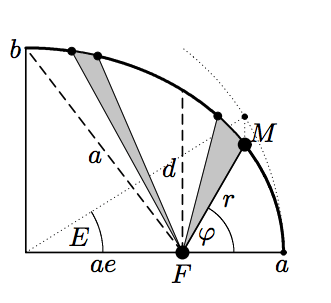


Consider the following two-body problem, wherein a single planet orbits around a large star. Stellar mass is much larger than planetary mass, so we choose the star as the center of our coordinate system. Now, consider the planet's two-dimensional elliptical orbit around the star. The position of the planet is given by the coordinates $q = (q_1, q_2)$, with the planet's velocity given by $p = \dot{q}$.

Newton's laws, with a suitable normalization, yield the following ordinary differential equations:

$$ \ddot{q_1} = -\frac{q_1}{(q_1^2 + q_2^2)^{3/2}},\ \ \ \ddot{q_2} = -\frac{q_2}{(q_1^2 + q_2^2)^{3/2}}. $$

This is equivalent to a Hamiltonian system with the Hamiltonian:
$$ H(p,q) = \frac{1}{2}(p_1^2 + p_2^2) - \frac{1}{\sqrt{q_1^2 + q_2^2}} $$
$$p_i = \dot{q_i}$$

We will consider the initial position and velocity of the planet to be:
$$ q_1(0) = 1-e,\ \ \ q_2(0) = 0,\ \ \ \dot{q_1}(0) = 0,\ \ \ \dot{q_2}(0) = \sqrt{\frac{1+e}{1-e}} $$

Now determine $q$ as a function of time $t$.




## A) 
 Q1. Using 400000 steps, use the explicit Euler method (Let $f(q) = \frac{dq}{dt}$. Then, $q(t+\Delta t) = \Delta t \cdot f(q)$ for small $\Delta t$) and plot the orbit of the planet. Assume $e = 0.6$ and integrate to a final time of $T_f = 200$.
 
 $$ q_{n+1} = q_n + \Delta t \cdot \dot{q_n} $$
$$ \dot{q}_{n+1} = p_{n+1} = p_n + \Delta t \cdot \dot{p_n} $$

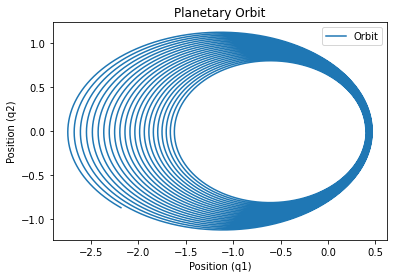

'--------------------Write your code above this line------------------------------'

In [337]:


'''--------------------Write your code below this line------------------------------'''
import numpy as np
import matplotlib.pyplot as plt


def equations(q1,q2,p1,p2):
    dq1dt = p1
    dq2dt = p2
    dp1dt = -q1/((q1**2+q2**2)**(3/2))
    dp2dt = -q2/((q1**2+q2**2)**(3/2))
    return dq1dt, dp1dt, dq2dt, dp2dt

def euler(q1, p1, q2, p2, dt):
    dq1dt, dp1dt, dq2dt, dp2dt = equations(q1,q2,p1,p2)
    q1_new = q1 + dt * dq1dt
    q2_new = q2 + dt * dq2dt
    p1_new = p1 + dt * dp1dt
    p2_new = p2 + dt * dp2dt
    return q1_new, p1_new, q2_new, p2_new


total_steps = 400000
final_time = 200.0
time_step = final_time / total_steps


q1_values = np.zeros(total_steps + 1)
q2_values = np.zeros(total_steps + 1)
p1_values = np.zeros(total_steps + 1)
p2_values = np.zeros(total_steps + 1)


q1_values[0] = .4
q2_values[0]=0. # Initial position
p1_values[0] = 0
p2_values[0] = np.sqrt(1.6/.4)


for i in range(total_steps):
    q1_values[i + 1], p1_values[i + 1],q2_values[i + 1], p2_values[i + 1] = euler(q1_values[i], p1_values[i],q2_values[i], p2_values[i], time_step)


plt.plot(q1_values, q2_values, label='Orbit')
plt.xlabel('Position (q1)')
plt.ylabel('Position (q2)')
plt.title('Planetary Orbit')
plt.legend()
plt.show()

'''--------------------Write your code above this line------------------------------'''

## B) 
Using 400000 steps, use the symplectic Euler method. 

$$ p_{n+1} = p_n - \Delta t H_q(p_{n+1}, q_n) $$
$$ q_{n+1} = q_n + \Delta t H_p(p_{n+1}, q_n) $$
or
$$ q_{n+1} = q_n + \Delta t H_p(p_n, q_{n+1}) $$
$$ p_{n+1} = p_n - \Delta t H_p(p_n, q_{n+1}) $$
where $H_p$ and $H_q$ denote the column vectors of partial derivatives of the Hamiltonian with respect to $p$ and $q$, respectively. i.e. $H_{p_1} = p_1, H_{q_1} = \frac{q_1}{(q_1^2 + q_2^2)^{3/2}}, H_{p_2} = p_2, H_{q_2} = \frac{q_2}{(q_1^2 + q_2^2)^{3/2}}$. 
 
 
Again plot the orbit of the planet. Compare your results in A) and B) by plotting both solutions in the same figure. 

In [365]:


'''--------------------Write your code below this line------------------------------'''
import numpy as np
import matplotlib.pyplot as plt


def equations(q1,q2,p1,p2):
    Hp1 = p1
    Hp2 = p2
    Hq1 = q1/((q1**2+q2**2)**(3/2))
    Hq2 = q2/((q1**2+q2**2)**(3/2))
    return Hp1, Hp2, Hq1, Hq2

def euler(q1, p1, q2, p2, dt):
    Hp1, Hp2, Hq1, Hq2 = equations(q1,q2,p1,p2)
    q1_new = q1 + dt * Hp1
    q2_new = q2 + dt * Hp2
    p1_new = p1 - dt * Hp1
    p2_new = p2 - dt * Hp2
    return q1_new, p1_new, q2_new, p2_new


total_steps = 400000
final_time = 200.0
time_step = final_time / total_steps


q1_val = np.zeros(total_steps + 1)
q2_val = np.zeros(total_steps + 1)
p1_val = np.zeros(total_steps + 1)
p2_val = np.zeros(total_steps + 1)


q1_val[0] = .4
q2_val[0]=0. # Initial position
p1_val[0] = 0
p2_val[0] = -np.sqrt(1.6/.4)


for i in range(total_steps):
    q1_val[i + 1], p1_val[i + 1],q2_val[i + 1], p2_val[i + 1] = euler(q1_val[i], p1_val[i],q2_val[i], p2_val[i], time_step)

#plt.plot(q1_values, q2_values, label='Orbit 1')
plt.plot(q1_val, q2_val, label='Orbit')

plt.xlabel('Position (q1)')
plt.ylabel('Position (q2)')
plt.title('Planetary Orbit')
plt.legend()
plt.show()


a1=q1_values
a2=q2_values

#should be just one circle but I don't know what is going wrong with this graph

print(q1_val)

'''--------------------Write your code above this line------------------------------'''

[0.4 0.4 0.4 ... 0.4 0.4 0.4]


'--------------------Write your code above this line------------------------------'